#### IMPORTING PACKAGES

In [1]:
#Importing EDA packages
import pandas as pd
import numpy as np
#Importing Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
#Importing sentiment packages
from textblob import TextBlob

#### LOAD AND PREVIEW DATASET

In [2]:
df = pd.read_csv("drugsComTrain_raw.tsv",sep='\t')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

#### MISSING VALUES

In [4]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

#### UNIQUE DRUGS

In [5]:
df['drugName'].unique().tolist()

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

#### HOW MANY DRUGS DO WE HAVE

In [6]:
len(df['drugName'].unique().tolist())

3436

#### TOP 20 POPULAR DRUGS

In [9]:
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Citalopram                             995
Medroxyprogesterone                    995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

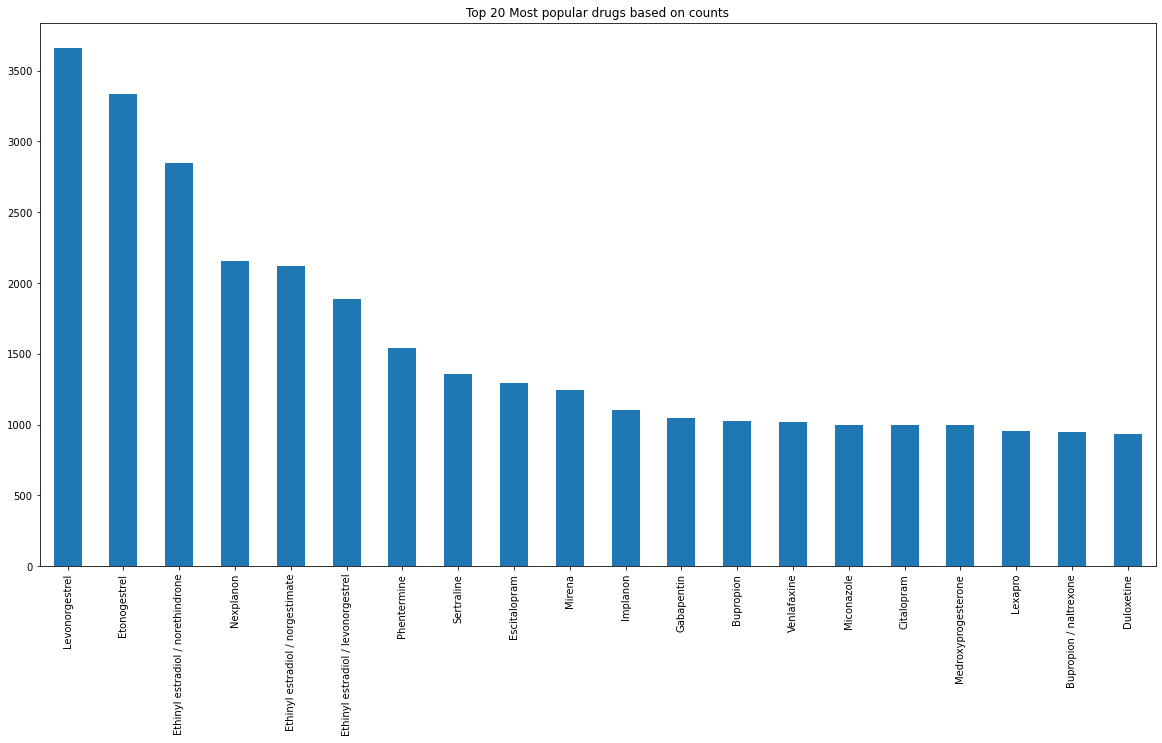

In [10]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

#### INTERPRETATION : MOST OF THE DRUGS ARE HORMONAL DRUGS

#### LEAST 20 POPULAR DRUGS

In [11]:
df['drugName'].value_counts().nsmallest(20)

Coagulation factor ix       1
Sertaconazole               1
Fostex Medicated            1
Gengraf                     1
Nystop                      1
Corzide 80 / 5              1
Loracarbef                  1
Extina                      1
Opsumit                     1
Bag Balm                    1
Prax                        1
HalfLytely and Bisacodyl    1
Vospire ER                  1
Macugen                     1
Nasarel                     1
Anturol                     1
Cyclopentolate              1
Pyrimethamine               1
Fluoroplex                  1
Dornase alfa                1
Name: drugName, dtype: int64

<AxesSubplot:>

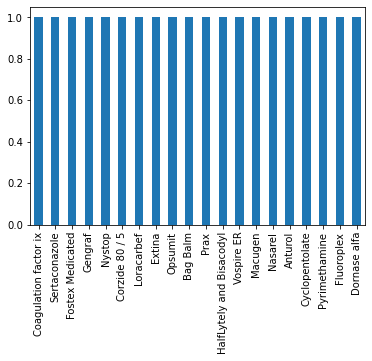

In [12]:
df['drugName'].value_counts().nsmallest(20).plot(kind='bar')

#### USED DRUGS GROUPS / CLASSIFICATION

In [14]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [15]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            print(True)
            print(drug_suffix[i])

In [16]:
classify_drug('Valsartan')

True
arb blocker


In [17]:
classify_drug('losartan')

True
arb blocker


In [18]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [19]:
classify_drug('valsartan')

'arb blocker'

In [20]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [21]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


#### GROUPS OF DRUG BY CLASS

In [22]:
df['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

#### NUMBER OF GROUP OF DRUGS BY CLASS

In [23]:
df['drug_class'].value_counts()

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

#### COMMON DRUG CLASS

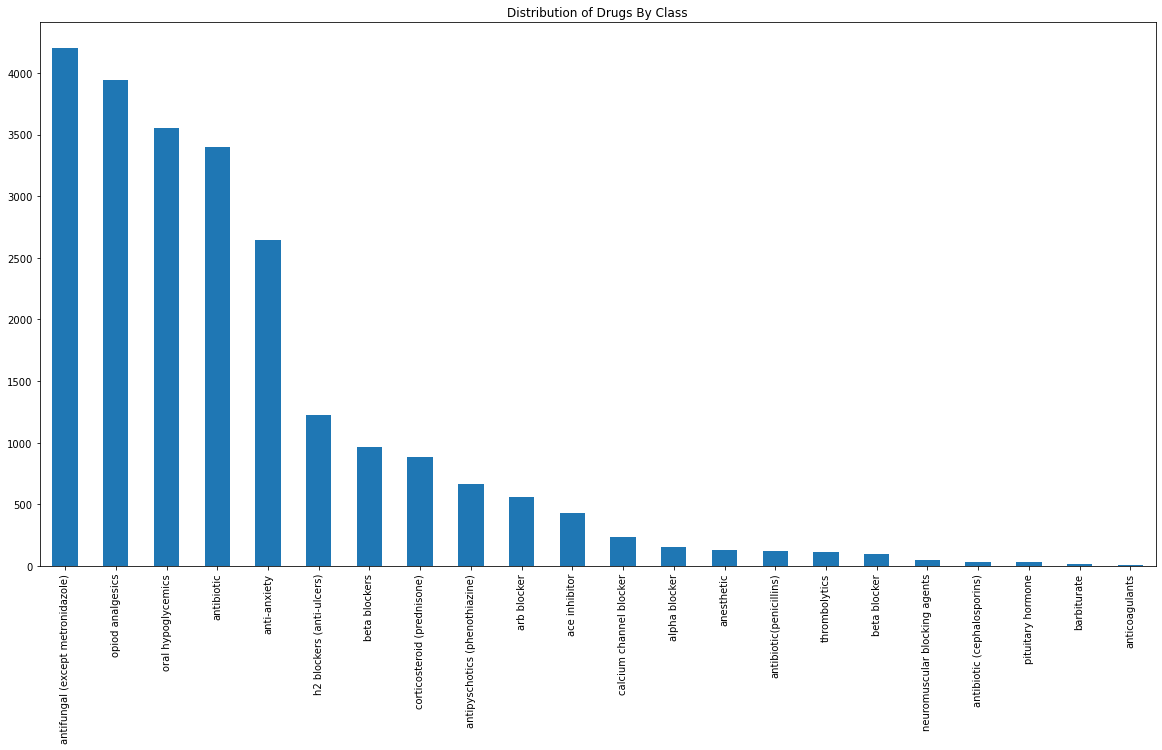

In [24]:
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs By Class")
plt.show()

#### INTERPRETATION : THE MOST COMMON CLASS/GROUP OF DRUGS ARE :
1. ANTIFUNGAL
2. OPIOD ANALGESICS(PAIN KILLERS)
3. ORAL HYPOGLYCEMICS (DM)
4. ANTIBIOTIC

#### NUMBER OF CONDITIONS

In [25]:
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [26]:
len(df['condition'].unique().tolist())

885

#### INTERPRETATION : WE HAVE 885 DIFFERENT CONDITIONS

#### DISTRIBUTION OF CONDITIONS

In [27]:
df['condition'].value_counts()

Birth Control                                  28788
Depression                                      9069
Pain                                            6145
Anxiety                                         5904
Acne                                            5588
                                               ...  
Subarachnoid Hemorrhage                            1
Aspergillosis, Aspergilloma                        1
47</span> users found this comment helpful.        1
Dissociative Identity Disorde                      1
Joint Infection                                    1
Name: condition, Length: 884, dtype: int64

#### MOST COMMONEST CONDITION

In [28]:
df['condition'].value_counts().nlargest(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

#### MOST COMMONEST CONDITION PLOT

<AxesSubplot:>

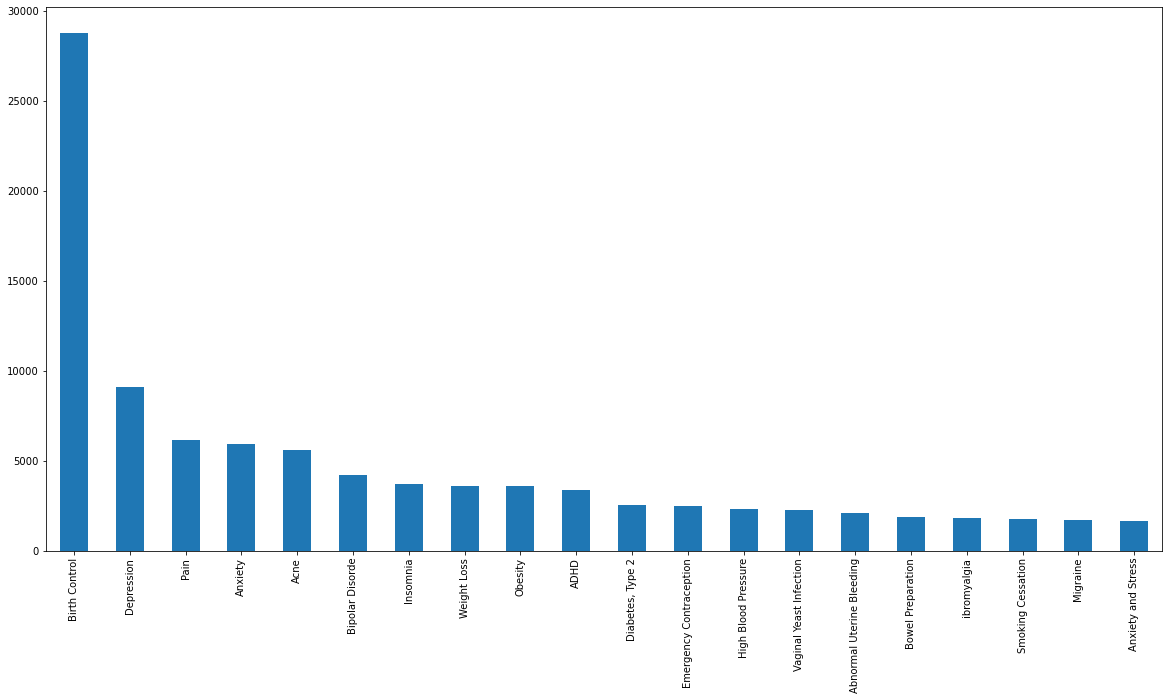

In [29]:
df['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

#### INTERPRETATION : 
1. THE MOST COMMONEST CONDITION IS BIRTH CONTROL, FOLLOWED BY DEPRESSION, PAIN AND ANXIETY.
2. MAKES SENSE AS COMPARED TO DRUG DISTRIBUTION

In [30]:
df['condition'].value_counts().nsmallest(20)

64</span> users found this comment helpful.    1
62</span> users found this comment helpful.    1
Esophageal Spasm                               1
Hypodermoclysis                                1
Cogan's Syndrome                               1
Asystole                                       1
Cluster-Tic Syndrome                           1
Tuberculosis, Active                           1
48</span> users found this comment helpful.    1
Linear IgA Disease                             1
Multiple Endocrine Adenomas                    1
Cerebral Edema                                 1
Wound Cleansing                                1
Neuritis                                       1
m Pain Disorde                                 1
Legionella Pneumonia                           1
Women (minoxidil)                              1
63</span> users found this comment helpful.    1
mist (                                         1
Hypokalemic Periodic Paralysis                 1
Name: condition, dty

#### LEAST COMMONEST CONDITION

<AxesSubplot:>

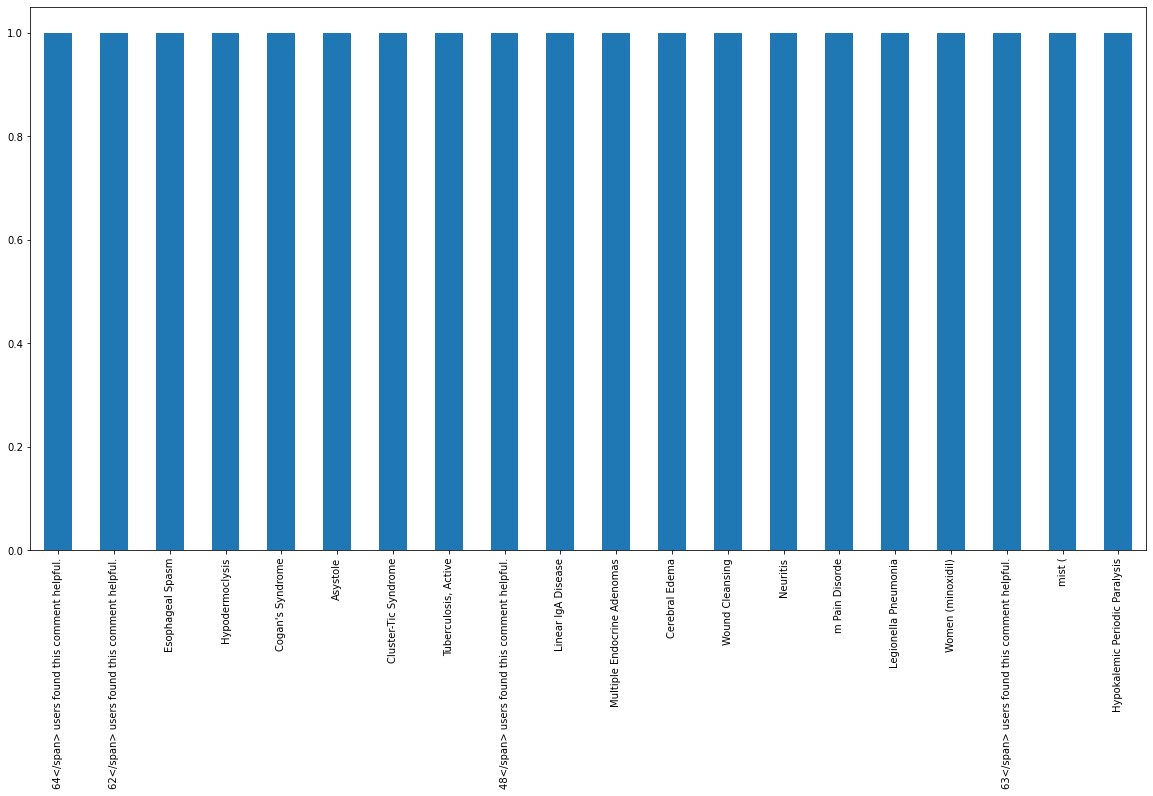

In [31]:
df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))

#### DRUGS PER CONDITION

In [32]:
df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

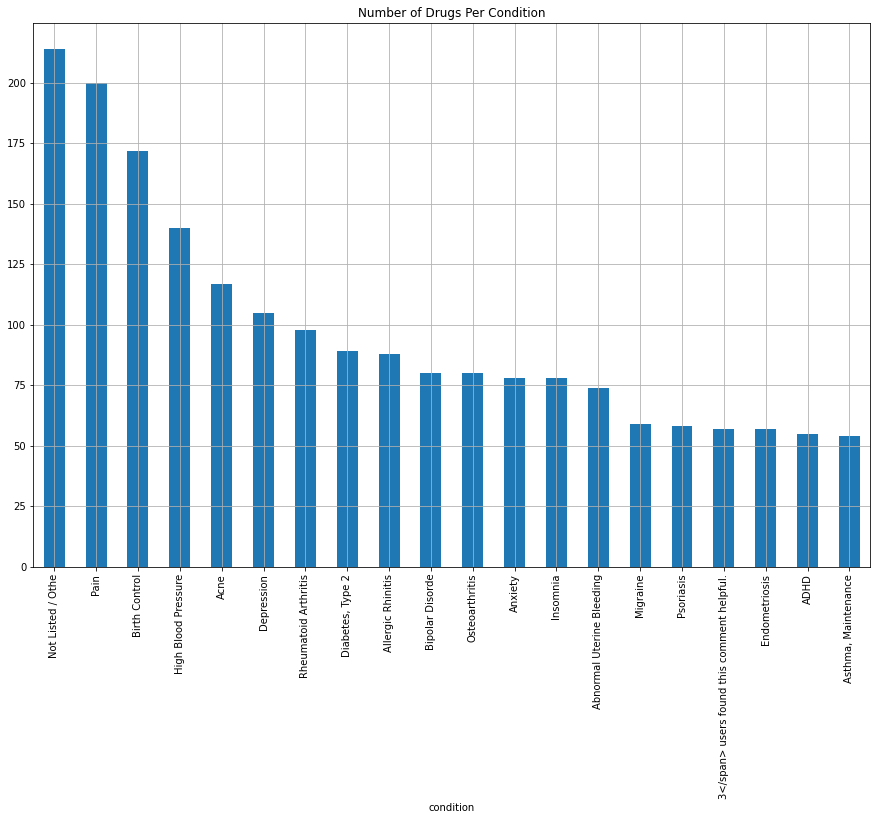

In [33]:
plt.figure(figsize=(15,10))
df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()

#### INTERPRETATION : PAIN, BIRTH CONTROL AND HBP HAVE THE HIGHEST NUMBER OF DIFFERENT/UNIQUE DRUG CONDITIONS

In [34]:
from textblob import TextBlob

In [35]:
df['review']

0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [36]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [37]:
get_sentiment("I love apples")

0.5

In [38]:
get_sentiment_label("I love apples")

'positive'

#### SENTIMENT SCORE FOR REVIEW

In [39]:
df['sentiment'] = df['review'].apply(get_sentiment)

#### SENTIMENT LABELS FOR REVIEW

In [40]:
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [41]:
df[['review','sentiment','sentiment_label']]

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,positive


#### NUMBER OF POSITIVE, NEGATIVE AND NEUTRAL REVIEWS

In [42]:
df['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

#### NUMBER OF POSITIVE, NEGATIVE AND NEUTRAL REVIEWS PLOT

<AxesSubplot:>

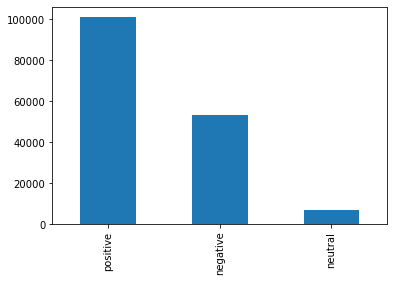

In [43]:
df['sentiment_label'].value_counts().plot(kind='bar')